# 1. Data Preprocessing

In [263]:
import importlib
import func
importlib.reload(func)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_rows = 50
%matplotlib inline

In [2]:
df_101191 = pd.read_excel("data/191_BWSC101 Release Log Form.xlsx")
df_101592 = pd.read_excel("data/592_BWSC101 Release Log Form.xlsx")
df_101607 = pd.read_excel("data/607_BWSC101 Release Log Form.xlsx")
df_chemical = pd.read_excel("data/Chemical.xlsx")

In [3]:
print(df_101191.shape)
print(df_101592.shape)
print(df_101607.shape)
print(df_chemical.shape)

(10943, 215)
(1535, 223)
(7125, 250)
(111892, 4)


In [342]:
CENSUS_2010_BG = pd.read_excel("data/Intersect_Release_CENSUS_2010_Block_Groups.xls")
CENSUS_2010_B = pd.read_excel("data/Intersect_Release_CENSUS_2010_Blocks.xls")

In [500]:
B_group_quarters_pop                = pd.read_excel("data/GIS/BLKGRP/group_quarters_pop.xlsx")
B_households_by_age_family_children = pd.read_excel("data/GIS/BLKGRP/households_by_age_family_children.xlsx")
B_households_size_by_family = pd.read_excel("data/GIS/BLKGRP/households_size_by_family.xlsx")
B_housing_owner_rental_demographics = pd.read_excel("data/GIS/BLKGRP/housing_owner_rental_demographics.xlsx")
B_housing_residency_characteristics = pd.read_excel("data/GIS/BLKGRP/housing_residency_characteristics.xlsx")
B_pop_by_age_gender = pd.read_excel("data/GIS/BLKGRP/pop_by_age_gender.xlsx")
B_pop_by_race = pd.read_excel("data/GIS/BLKGRP/pop_by_race.xlsx")

In [585]:
df_101_tier.to_excel("df_101_tier.xlsx")

## 1.1 Process BWSC101
* There are three files of BWSC101

In [4]:
df_101191["RTN"] = df_101191.apply(func.completeRTN, axis=1)
df_101592["RTN"] = df_101592.apply(func.completeRTN, axis=1)
df_101607["RTN"] = df_101607.apply(func.completeRTN, axis=1)

In [5]:
func.preprocess(df_101607, "101607proc.xlsx", "101607")
print(df_101607.shape)
func.preprocess(df_101592, "101592proc.xlsx", "101592")
print(df_101592.shape)
func.preprocess(df_101191, "101191proc.xlsx", "101191")
print(df_101191.shape)

(7125, 144)
(1535, 144)
(10943, 144)


In [6]:
df_101 = df_101191.append(df_101592)
df_101 = df_101.append(df_101607)

In [7]:
df_101.shape

(19603, 144)

In [8]:
len(df_101['RTN'].unique())

18958

In [9]:
func.prepmissing(df_101191) # it is not processing
func.prepmissing(df_101592) # it is not processing
func.prepmissing(df_101607) # it is not processing

## 1.2 Process Tier 1D

In [304]:
df_tclass = pd.read_excel('data/TClass Phase Action Dates All RTNs 2-12-2018.xlsx', sheetname="All")

In [308]:
df_tclass.drop_duplicates("RTN", inplace=True)

In [309]:
df_tclass.shape

(49852, 30)

In [310]:
df_tclass["Tier1D"] = df_tclass.apply(func.isTier1D, axis=1)

In [311]:
df_tclass['RTN'].groupby(df_tclass["Tier1D"]).count()

Tier1D
False    36627
True     13225
Name: RTN, dtype: int64

In [312]:
len(df_tclass['RTN'].unique())

49852

In [313]:
len(df_tclass['RTN'])

49852

In [314]:
df_tclass_tier1D = df_tclass.loc[:,['RTN',"Notification","Phase1Cs","End Date","Tier1D"]]
df_tclass_tier1D.head()

,RTN,Notification,Phase1Cs,End Date,Tier1D
0,1-0000001,2002-02-02,NaT,1995-10-11,False
1,1-0000003,1987-01-15,NaT,1996-08-08,True
2,1-0000004,1986-11-17,NaT,1986-12-31,False
3,1-0000005,1987-01-15,NaT,1993-07-23,True
4,1-0000006,1987-04-15,1998-07-31,2005-09-27,True


In [315]:
df_101_tier = df_101.set_index("RTN").join(df_tclass_tier1D.set_index("RTN"), how="inner")
df_101_tier = df_101_tier.drop(["Notification","Phase1Cs","End Date"], axis = 1)
df_101_tier['Tier1D'] = df_101_tier['Tier1D'].astype(int)
df_101_tier.shape

(13021, 144)

In [316]:
X = df_101_tier.iloc[:, :-1]
y = df_101_tier.iloc[:, -1]

In [318]:
y.groupby(y).count() / 13021

Tier1D
0    0.914523
1    0.085477
Name: Tier1D, dtype: float64

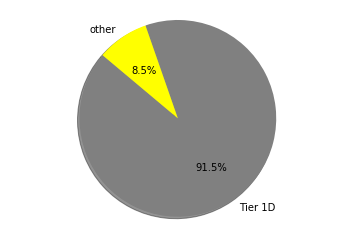

In [320]:
plt.pie(y.groupby(y).count() / 13021, labels=["Tier 1D", "other"], colors=['grey', 'yellow'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

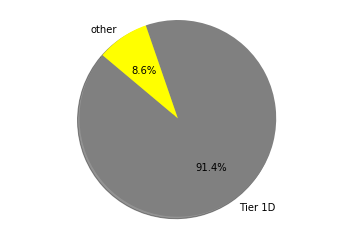

In [440]:
plt.pie(y.groupby(y).count() / len(y), labels=["Tier 1D", "other"], colors=['grey', 'yellow'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## 1.3 Process Chemicals

In [16]:
df_chemical.head()

,RTN,Chemical,Amount,Units
0,2-0010055,PHOSPHORIC ACID,96.72,LBS
1,3-0010061,#2 FUEL OIL,NaN,NaN
2,3-0010034,DIESEL FUEL,15.00,GAL
3,4-3010035,#2 FUEL OIL,50.00,PPMV
4,4-3010035,#2 FUEL OIL,NaN,NaN


In [261]:
df_chemical.shape

(111892, 4)

In [258]:
df_chemical["Chemical"].groupby(df_chemical["Chemical"]).count().sort_values(ascending=False)[:50]

Chemical
#2 FUEL OIL                                      10109
GASOLINE                                          7177
DIESEL FUEL                                       7045
UNKNOWN                                           5150
LEAD                                              3318
HYDRAULIC FLUID                                   2870
C11 THRU C22 AROMATIC HYDROCARBONS                2656
TPH                                               2603
PETROLEUM                                         2465
FUEL OIL #2                                       2352
WASTE OIL                                         1892
C9 THRU C18 ALIPHATIC HYDROCARBONS                1885
OIL                                               1853
HYDRAULIC OIL                                     1816
BENZO[A]PYRENE                                    1809
ARSENIC                                           1723
C9 THRU C10 AROMATIC HYDROCARBONS                 1671
NAPHTHALENE                                       1572
2

## 1.4 Include GIS data

In [501]:
df_101_tier.shape

(13021, 144)

In [502]:
df_tiergis = df_101_tier.join(CENSUS_2010_BG[['rtn']].set_index('rtn'), how='inner', rsuffix='_')

In [503]:
df_tiergis.shape

(10996, 144)

In [ ]:
# B_group_quarters_pop                = pd.read_excel("data/GIS/group_quarters_pop.xlsx")
# B_households_by_age_family_children = pd.read_excel("data/GIS/households_by_age_family_children.xlsx")
# B_households_size_by_family = pd.read_excel("data/GIS/households_size_by_family.xlsx")
# B_housing_owner_rental_demographics = pd.read_excel("data/GIS/housing_owner_rental_demographics.xlsx")
# B_housing_residency_characteristics = pd.read_excel("data/GIS/housing_residency_characteristics.xlsx")
# B_pop_by_age_gender = pd.read_excel("data/GIS/pop_by_age_gender.xlsx")
# B_pop_by_race = pd.read_excel("data/GIS/pop_by_race.xlsx")

In [504]:
gis_block = B_group_quarters_pop.join(B_households_by_age_family_children.set_index("LOGRECNO"), how='inner', on='LOGRECNO', rsuffix='_')

In [505]:
gis_block = gis_block.join(B_households_size_by_family.set_index("LOGRECNO"), how='inner', on='LOGRECNO', rsuffix='_')

In [506]:
gis_block = gis_block.join(B_housing_owner_rental_demographics.set_index("LOGRECNO"), how='inner', on='LOGRECNO', rsuffix='_')
gis_block = gis_block.join(B_housing_residency_characteristics.set_index("LOGRECNO"), how='inner', on='LOGRECNO', rsuffix='_')
gis_block = gis_block.join(B_pop_by_age_gender.set_index("LOGRECNO"), how='inner', on='LOGRECNO', rsuffix='_')
gis_block = gis_block.join(B_pop_by_race.set_index("LOGRECNO"), how='inner', on='LOGRECNO', rsuffix='_')

In [507]:
features = gis_block.columns.tolist()

In [508]:
features = list(filter(lambda a: a != 'GEOID10_', features))

In [509]:
features = list(filter(lambda a: a != 'GEOID10', features))

In [510]:
gis_block = gis_block.loc[:, features]

In [511]:
gis_block = gis_block.set_index("LOGRECNO")

In [512]:
selected = ["LOGSF1", "rtn"]
df_gisblock = CENSUS_2010_BG.loc[:, selected].set_index('LOGSF1').join(gis_block, how='inner')

In [513]:
df_gisblock.shape

(11011, 243)

In [514]:
df_gisblock = df_gisblock.set_index("rtn")

In [515]:
df_101_tiergis = df_101_tier.join(df_gisblock, how='inner')

In [560]:
Xgis = df_101_tier[["Tier1D"]].join(df_gisblock, how='inner')

In [561]:
Xgis = Xgis.drop("Tier1D", axis=1)

In [516]:
X = df_101_tiergis.drop("Tier1D", axis=1)
y = df_101_tiergis.loc[:, "Tier1D"]

# 2. Modeling
* The data would be represented as X and y

In [518]:
importlib.reload(func)
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import svm
from sklearn.svm import NuSVC
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

## 2.1 Feature Selection

In [562]:
# Use random forest to extract useful features
# Use all the data
rfmodel = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rfmodel.fit(Xgis, y)
feat_import = pd.DataFrame({"Feature": Xgis.columns, "Importance": rfmodel.feature_importances_})\
        .sort_values("Importance", ascending=False)

In [563]:
feat_import['Feature'][:20].tolist()

['VAC_OTHER',
 'POP_BLACK',
 'NH_BLACK',
 'VAC_HOUSE',
 'RNTR_BLACK',
 'HS_RNT_SZ',
 'NH_ASN',
 'OWN25_34',
 'NH_MULTI',
 'MED_AGE_M',
 'MPOP35_39',
 'HS_BLACK',
 'HISP',
 'NF_HSHLD_3',
 'POP_ASN',
 'POP_OTHER',
 'RNTR_WHITE',
 'OWN_BLACK',
 'FPOP_17',
 'POP_MULTI']

In [564]:
features10 = feat_import['Feature'][:10].tolist()
features20 = feat_import['Feature'][:20].tolist()
features30 = feat_import['Feature'][:30].tolist()
features50 = feat_import['Feature'][:50].tolist()

In [565]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xs = sel.fit_transform(X)

In [566]:
Xsf = X.columns[sel.variances_ > .8 * (1 - .8)].tolist()

In [567]:
Xs = pd.DataFrame(Xs, columns=Xsf)

In [568]:
Xs.shape

(10996, 265)

## 2.2 Modeling

In [571]:
X_train, X_test, y_train, y_test = train_test_split(Xgis, 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=2001)

In [572]:
X_train.shape

(8247, 242)

In [573]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
print(X_train.shape)
print(Counter(y_train).items())
print(X_train.shape)
print("Training size: %r" %X_train.shape[0])
print("Test size: %r" %X_test.shape[0])

(15074, 242)
dict_items([(0, 7537), (1, 7537)])
(15074, 242)
Training size: 15074
Test size: 2749


Confusion matrix, without normalization
[[  12  224]
 [  66 2447]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.05      0.08       236
      other       0.92      0.97      0.94      2513

avg / total       0.85      0.89      0.87      2749



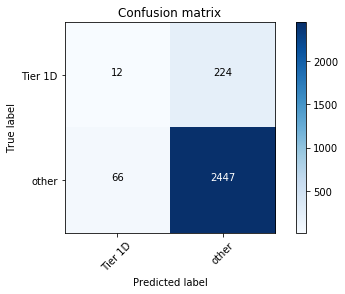

In [574]:
svc = LinearSVC(dual=True)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 102  134]
 [1002 1511]]
             precision    recall  f1-score   support

    Tier 1D       0.09      0.43      0.15       236
      other       0.92      0.60      0.73      2513

avg / total       0.85      0.59      0.68      2749



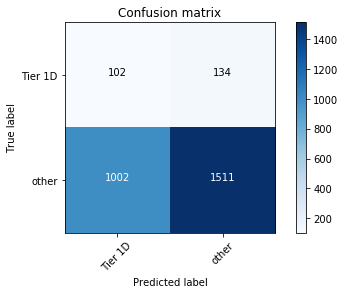

In [540]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[  73  163]
 [ 499 2014]]
             precision    recall  f1-score   support

    Tier 1D       0.13      0.31      0.18       236
      other       0.93      0.80      0.86      2513

avg / total       0.86      0.76      0.80      2749



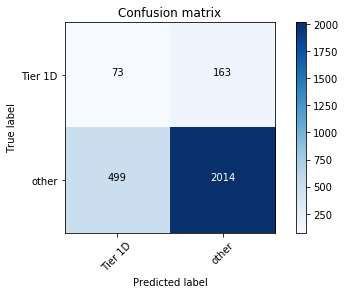

In [575]:
rf = RandomForestClassifier(max_depth=4, n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

In [442]:
X_train.shape

(15078, 385)

Confusion matrix, without normalization
[[  32  204]
 [ 203 2310]]
             precision    recall  f1-score   support

    Tier 1D       0.14      0.14      0.14       236
      other       0.92      0.92      0.92      2513

avg / total       0.85      0.85      0.85      2749



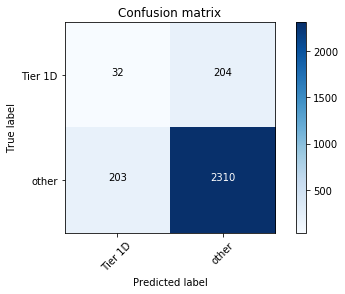

In [576]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_predict = ab.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 132  104]
 [1247 1266]]
             precision    recall  f1-score   support

    Tier 1D       0.10      0.56      0.16       236
      other       0.92      0.50      0.65      2513

avg / total       0.85      0.51      0.61      2749



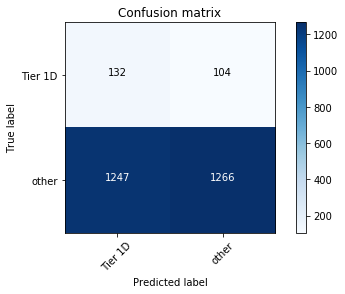

In [577]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_predict = bnb.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 174   62]
 [1736  777]]
             precision    recall  f1-score   support

    Tier 1D       0.09      0.74      0.16       236
      other       0.93      0.31      0.46      2513

avg / total       0.85      0.35      0.44      2749



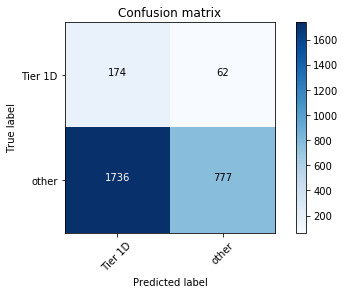

In [578]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[  70  166]
 [ 609 1904]]
             precision    recall  f1-score   support

    Tier 1D       0.92      0.76      0.83      2513
      other       0.10      0.30      0.15       236

avg / total       0.85      0.72      0.77      2749



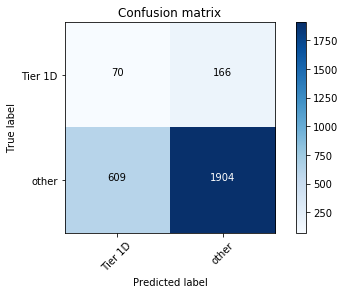

In [580]:
svm = NuSVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[  25  211]
 [  62 2451]]
             precision    recall  f1-score   support

    Tier 1D       0.29      0.11      0.15       236
      other       0.92      0.98      0.95      2513

avg / total       0.87      0.90      0.88      2749



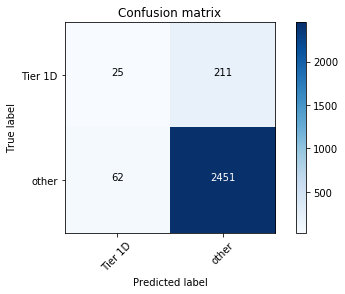

In [553]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

In [429]:
clfs = func.Clf(Xs, y)

In [423]:
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)

In [424]:
clfs.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.059206,0.314495,0.098908,0.986072,0.917602,0.950599
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.077161,0.327611,0.123223,0.983187,0.918832,0.949910
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.053914,0.311090,0.090961,0.987366,0.917280,0.951027
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.503165,0.149082,0.229753,0.729407,0.939826,0.821148
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.523225,0.155341,0.239249,0.732093,0.942351,0.823795
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.512609,0.157779,0.241156,0.741842,0.941777,0.829843
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.467170,0.163633,0.242192,0.775269,0.939298,0.849350
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.447101,0.160327,0.235517,0.778452,0.937381,0.850349
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.439713,0.174844,0.250101,0.803522,0.938373,0.865694
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.383685,0.179393,0.244311,0.834660,0.935039,0.881969


In [340]:
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)
clfs.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clfs.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, True)

In [341]:
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, False)
clfs.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, False)
clfs.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, False)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, False)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, False)

In [335]:
clfs.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.232682,0.161381,0.190056,0.886379,0.925151,0.905295
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.230000,0.165250,0.192231,0.891250,0.925283,0.907939
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.230896,0.170794,0.196287,0.895197,0.925670,0.910173
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.753829,0.142501,0.239686,0.575999,0.961596,0.720425
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.738548,0.142779,0.239282,0.585573,0.959970,0.727375
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.752917,0.140826,0.237259,0.570541,0.961103,0.715977
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.738554,0.145093,0.242535,0.593299,0.960451,0.733486
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.725968,0.146224,0.243411,0.603796,0.959317,0.741100
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.743918,0.144779,0.242371,0.589268,0.961000,0.730511
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.663018,0.153853,0.249376,0.657709,0.954486,0.778129


In [49]:
clf = func.Clf(X, y)

In [50]:
clf.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)
clf.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, False)

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

In [52]:
clf.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clf.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, False)

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
clf.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, True)
clf.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, False)

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

In [ ]:
clf.runKfold(NuSVC, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, True)

In [109]:
# RandomForestClassifier, LinearSVC, LogisticRegression
clf.clf_eval[clf.clf_eval['clf'] == 'RandomForestClassifier']

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.248377,0.303108,0.272851,0.941775,0.924798,0.933205
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.254058,0.310143,0.279175,0.942106,0.925341,0.933646
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.254058,0.311201,0.279658,0.942437,0.925365,0.933821
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.754870,0.152559,0.253786,0.572410,0.958194,0.716572
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.742695,0.155780,0.257529,0.589860,0.957461,0.729961
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.776786,0.153314,0.256053,0.562898,0.961247,0.709902
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.745942,0.155909,0.257899,0.588288,0.957832,0.728862
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.733766,0.158403,0.260511,0.602266,0.956884,0.739133
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.697240,0.172321,0.276263,0.658588,0.955311,0.779553
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.714286,0.165504,0.268536,0.631542,0.955953,0.760206


In [79]:
# RandomForestClassifier, LinearSVC, LogisticRegression
clf.clf_eval[clf.clf_eval['clf'] == 'LogisticRegression']

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
34,LogisticRegression,"{'C': 0.01, 'dual': False, 'penalty': 'l1'}",True,0.737825,0.164888,0.269528,0.619222,0.958659,0.752402
35,LogisticRegression,"{'C': 0.01, 'dual': False, 'penalty': 'l2'}",True,0.731331,0.175395,0.282895,0.649327,0.959537,0.774462
36,LogisticRegression,"{'C': 0.1, 'dual': False, 'penalty': 'l1'}",True,0.719968,0.175689,0.282415,0.655612,0.958305,0.778515
37,LogisticRegression,"{'C': 0.1, 'dual': False, 'penalty': 'l2'}",True,0.739448,0.164385,0.268532,0.613519,0.958580,0.747141
38,LogisticRegression,"{'C': 1, 'dual': False, 'penalty': 'l1'}",True,0.707792,0.176973,0.283097,0.664462,0.957144,0.784314
39,LogisticRegression,"{'C': 1, 'dual': False, 'penalty': 'l2'}",True,0.706169,0.175902,0.281594,0.662559,0.956770,0.782859
40,LogisticRegression,"{'C': 10, 'dual': False, 'penalty': 'l1'}",True,0.697240,0.173694,0.278036,0.661567,0.955451,0.781698
41,LogisticRegression,"{'C': 10, 'dual': False, 'penalty': 'l2'}",True,0.698052,0.174648,0.279334,0.663718,0.955736,0.783312
42,LogisticRegression,"{'C': 100, 'dual': False, 'penalty': 'l1'}",True,0.709416,0.177000,0.283253,0.663635,0.957311,0.783784
43,LogisticRegression,"{'C': 100, 'dual': False, 'penalty': 'l2'}",True,0.713474,0.175877,0.282172,0.659168,0.957581,0.780804


In [76]:
(report["clf"] + report["params"].astype(str)).tolist()

["LogisticRegression{'C': 0.01, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 0.01, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 0.1, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 0.1, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 1, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 1, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 10, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 10, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 100, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 100, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 0.01, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 0.01, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 0.1, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 0.1, 'dual': False, 'penalty': 'l2'}",
 "LogisticRegression{'C': 1, 'dual': False, 'penalty': 'l1'}",
 "LogisticRegression{'C': 1, 

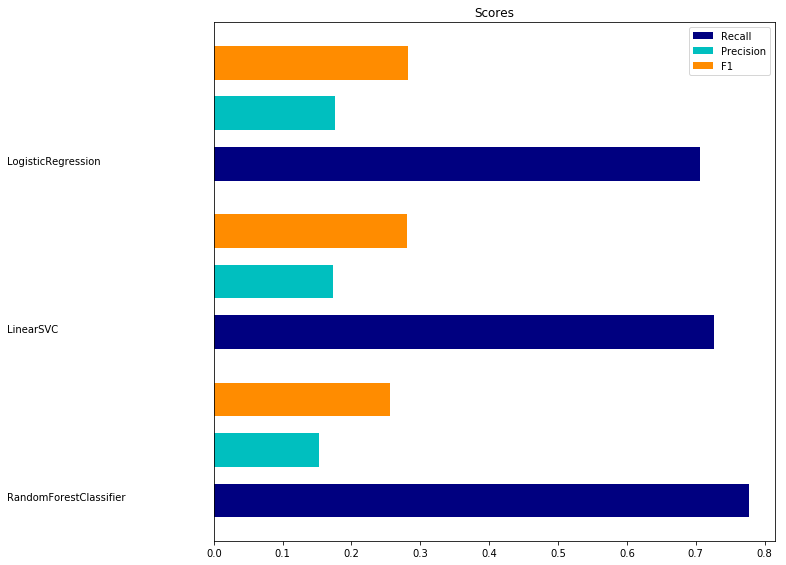

In [82]:
indices2 = np.arange(report.shape[0])
plt.figure(figsize=(12, 8))
plt.title("Scores")
plt.barh(indices2, report['Trecall'], .2, label="Recall", color='navy')
plt.barh(indices2 + .3, report['Tprecision'], .2, label="Precision",
         color='c')
plt.barh(indices2 + .6, report['Tf1'], .2, label="F1", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

#  + report["params"].astype(str)
for i, c in zip(indices2, (report["clf"]).tolist()):
    plt.text(-.3, i, c)
plt.show()

In [218]:
clf1 = func.Clf(X[features10], y)

In [219]:
clf1.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)
clf1.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clf1.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, True)
clf1.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clf1.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, True)

In [220]:
clf1.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.422078,0.164680,0.236812,0.782153,0.930023,0.849656
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.429383,0.166203,0.239185,0.779673,0.930644,0.848278
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.409091,0.165151,0.235074,0.789514,0.929196,0.853588
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.604708,0.141573,0.229405,0.626335,0.939596,0.751572
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.605519,0.141076,0.228789,0.624433,0.939577,0.750152
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.594156,0.142395,0.229698,0.635432,0.938936,0.757858
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.581981,0.144967,0.232099,0.650402,0.938571,0.768325
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.579545,0.148070,0.235832,0.659913,0.939030,0.775042
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.564123,0.147953,0.234355,0.668929,0.937776,0.780759
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.576299,0.150731,0.238860,0.669095,0.939445,0.781412


In [210]:
clf2 = func.Clf(X[features20], y)

In [211]:
clf2.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)
clf2.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clf2.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, True)

In [214]:
clf2.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)

In [216]:
clf2.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, True)

In [217]:
clf2.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.280032,0.226563,0.249924,0.901912,0.924782,0.913168
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.291396,0.217317,0.248428,0.892565,0.925170,0.908534
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.288149,0.222857,0.251120,0.897610,0.925243,0.911203
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.545455,0.177839,0.268184,0.743032,0.941338,0.830485
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.558442,0.184231,0.277036,0.748078,0.943280,0.834400
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.556818,0.178743,0.270558,0.739061,0.942417,0.828403
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.530032,0.186013,0.275341,0.763625,0.940999,0.843064
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.534091,0.187467,0.277462,0.764039,0.941512,0.843512
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.534903,0.187631,0.277733,0.763957,0.941609,0.843492
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.508929,0.194686,0.281538,0.785543,0.940143,0.855882


## 2.3 Downsampling

In [232]:
rus = RandomUnderSampler(random_state=1989)
X_res, y_res = rus.fit_sample(X_train, y_train)
print(X_res.shape)
print(Counter(y).items())
print(Counter(y_res).items())

(1848, 143)
dict_items([(1, 1232), (0, 12091)])
dict_items([(0, 924), (1, 924)])


## NB

Confusion matrix, without normalization
[[ 235   73]
 [1402 1621]]
             precision    recall  f1-score   support

    Tier 1D       0.14      0.76      0.24       308
      other       0.96      0.54      0.69      3023

avg / total       0.88      0.56      0.65      3331



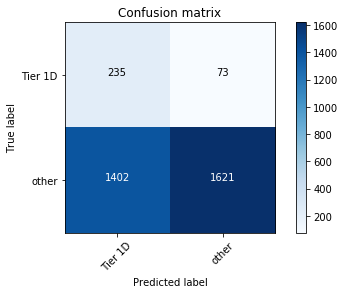

In [233]:
gnb = GaussianNB()
gnb.fit(X_res, y_res)
y_predict = gnb.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 215   93]
 [1199 1824]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.70      0.25       308
      other       0.95      0.60      0.74      3023

avg / total       0.88      0.61      0.69      3331



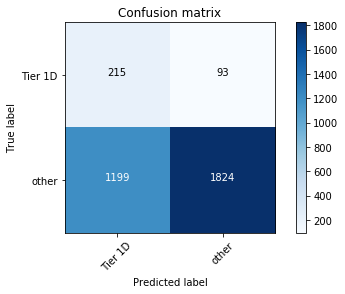

In [234]:
bnb = BernoulliNB()
bnb.fit(X_res, y_res)
y_predict = bnb.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

### SVM

Confusion matrix, without normalization
[[ 187  121]
 [ 830 2193]]
             precision    recall  f1-score   support

    Tier 1D       0.18      0.61      0.28       308
      other       0.95      0.73      0.82      3023

avg / total       0.88      0.71      0.77      3331



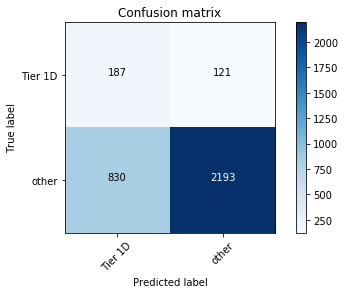

In [235]:
svc = LinearSVC(dual=True)
svc.fit(X_res, y_res)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 255   53]
 [1456 1567]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.83      0.25       308
      other       0.97      0.52      0.67      3023

avg / total       0.89      0.55      0.64      3331



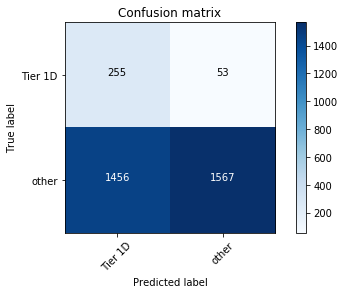

In [236]:
svc = SVC(kernel='rbf')
svc.fit(X_res, y_res)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

### Random Forest

Confusion matrix, without normalization
[[ 219   89]
 [ 986 2037]]
             precision    recall  f1-score   support

    Tier 1D       0.18      0.71      0.29       308
      other       0.96      0.67      0.79      3023

avg / total       0.89      0.68      0.74      3331



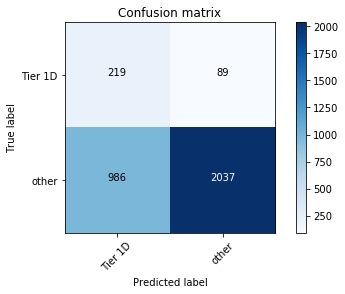

In [237]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_res, y_res)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

### Adaboost

Confusion matrix, without normalization
[[ 216   92]
 [1118 1905]]
             precision    recall  f1-score   support

    Tier 1D       0.16      0.70      0.26       308
      other       0.95      0.63      0.76      3023

avg / total       0.88      0.64      0.71      3331



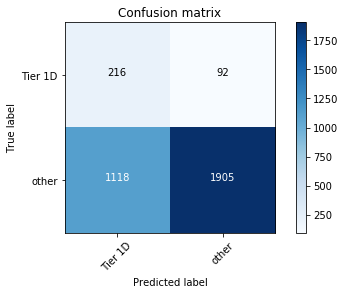

In [238]:
ab = AdaBoostClassifier()
ab.fit(X_res, y_res)
y_predict = ab.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

## Other Downsampling

In [242]:
cc = ClusterCentroids(random_state=1223)
X_res, y_res = cc.fit_sample(X_train, y_train)
print(X_res.shape)
print(Counter(y).items())
print(Counter(y_res).items())

(1848, 143)
dict_items([(1, 1232), (0, 12091)])
dict_items([(0, 924), (1, 924)])


Confusion matrix, without normalization
[[ 248   60]
 [1533 1490]]
             precision    recall  f1-score   support

    Tier 1D       0.14      0.81      0.24       308
      other       0.96      0.49      0.65      3023

avg / total       0.89      0.52      0.61      3331



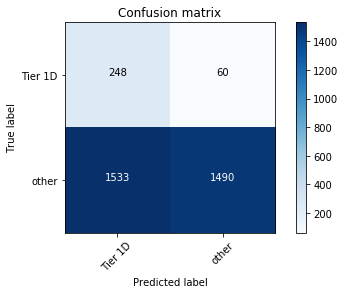

In [243]:
gnb = GaussianNB()
gnb.fit(X_res, y_res)
y_predict = gnb.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 308    0]
 [3003   20]]
             precision    recall  f1-score   support

    Tier 1D       0.09      1.00      0.17       308
      other       1.00      0.01      0.01      3023

avg / total       0.92      0.10      0.03      3331



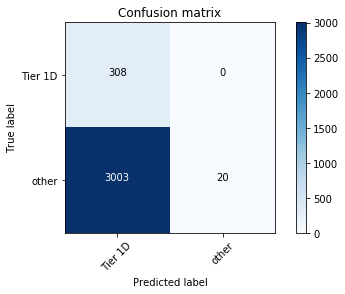

In [244]:
bnb = BernoulliNB()
bnb.fit(X_res, y_res)
y_predict = bnb.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 238   70]
 [1408 1615]]
             precision    recall  f1-score   support

    Tier 1D       0.14      0.77      0.24       308
      other       0.96      0.53      0.69      3023

avg / total       0.88      0.56      0.65      3331



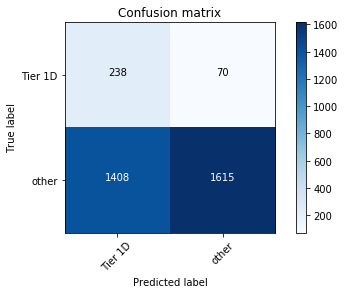

In [245]:
svc = LinearSVC(dual=True)
svc.fit(X_res, y_res)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 242   66]
 [1391 1632]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.79      0.25       308
      other       0.96      0.54      0.69      3023

avg / total       0.89      0.56      0.65      3331



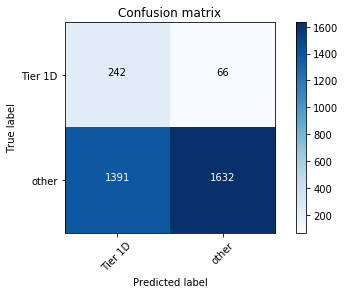

In [246]:
svc = SVC(kernel='rbf')
svc.fit(X_res, y_res)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 296   12]
 [2544  479]]
             precision    recall  f1-score   support

    Tier 1D       0.10      0.96      0.19       308
      other       0.98      0.16      0.27      3023

avg / total       0.89      0.23      0.26      3331



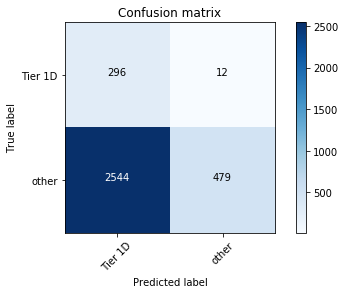

In [247]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_res, y_res)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 296   12]
 [2741  282]]
             precision    recall  f1-score   support

    Tier 1D       0.10      0.96      0.18       308
      other       0.96      0.09      0.17      3023

avg / total       0.88      0.17      0.17      3331



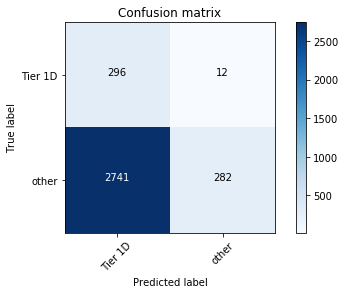

In [248]:
ab = AdaBoostClassifier()
ab.fit(X_res, y_res)
y_predict = ab.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

## SGD

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Confusion matrix, without normalization
[[ 136  172]
 [ 547 2476]]
             precision    recall  f1-score   support

    Tier 1D       0.20      0.44      0.27       308
      other       0.94      0.82      0.87      3023

avg / total       0.87      0.78      0.82      3331



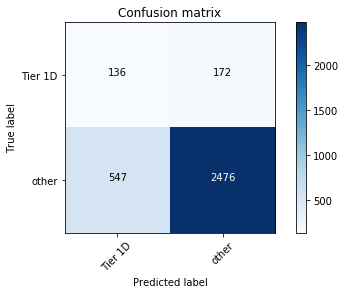

In [239]:
sgd = SGDClassifier(loss="hinge", penalty="l1", n_jobs=-1)
sgd.fit(X_res, y_res)
y_predict = sgd.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

## PCA

In [156]:
# PCA processing
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [157]:
pca.singular_values_

array([  1.22339112e+05,   2.76924514e+04,   1.19543319e+03,
         1.63085830e+02,   1.12216082e+02,   1.01497880e+02,
         9.33276711e+01,   7.47824937e+01,   7.26171898e+01,
         7.20028023e+01])

In [158]:
pca.explained_variance_ratio_

array([  9.51163777e-01,   4.87357279e-02,   9.08186981e-05,
         1.69027400e-06,   8.00266910e-07,   6.54694357e-07,
         5.53535540e-07,   3.55405823e-07,   3.35122456e-07,
         3.29475747e-07])

In [159]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.95116378,  0.9998995 ,  0.99999032,  0.99999201,  0.99999281,
        0.99999347,  0.99999402,  0.99999438,  0.99999471,  0.99999504])

Confusion matrix, without normalization
[[ 142  166]
 [ 474 2549]]
             precision    recall  f1-score   support

    Tier 1D       0.23      0.46      0.31       308
      other       0.94      0.84      0.89      3023

avg / total       0.87      0.81      0.83      3331



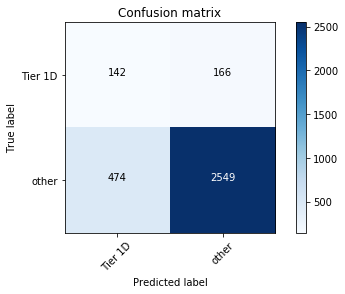

In [160]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_train_pca, y_train)
y_predict = rf.predict(X_test_pca)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 197  111]
 [1126 1897]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.64      0.24       308
      other       0.94      0.63      0.75      3023

avg / total       0.87      0.63      0.71      3331



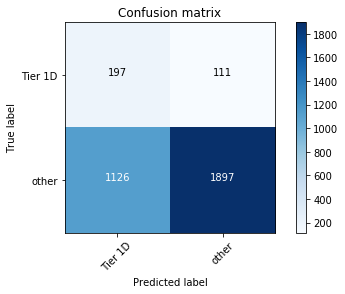

In [161]:
ab = AdaBoostClassifier()
ab.fit(X_train_pca, y_train)
y_predict = ab.predict(X_test_pca)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Confusion matrix, without normalization
[[ 308    0]
 [3012   11]]
             precision    recall  f1-score   support

    Tier 1D       0.09      1.00      0.17       308
      other       1.00      0.00      0.01      3023

avg / total       0.92      0.10      0.02      3331



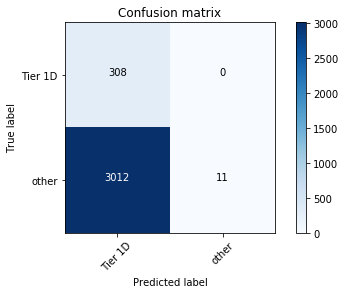

In [162]:
sgd = SGDClassifier(loss="hinge", penalty="l1", n_jobs=-1)
sgd.fit(X_train_pca, y_train)
y_predict = sgd.predict(X_test_pca)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

## Try feature selection and SMOTE

In [183]:
sf = features10

In [186]:
X_trainsf = X_train[sf]
X_testsf = X_test[sf]

In [191]:
X_trains, y_trains = SMOTE().fit_sample(X_trainsf, y_train)
print(X_trains.shape)
print(Counter(y).items())
print(Counter(y_trains).items())
print(Counter(y_test).items())
print(X_train.shape)
print("Training size: %r" %X_trains.shape[0])
print("Test size: %r" %X_test.shape[0])
print(Counter(y).items())

(18136, 10)
dict_items([(1, 1232), (0, 12091)])
dict_items([(0, 9068), (1, 9068)])
dict_items([(0, 3023), (1, 308)])
(9992, 143)
Training size: 18136
Test size: 3331
dict_items([(1, 1232), (0, 12091)])


Confusion matrix, without normalization
[[ 286   22]
 [2616  407]]
             precision    recall  f1-score   support

    Tier 1D       0.10      0.93      0.18       308
      other       0.95      0.13      0.24      3023

avg / total       0.87      0.21      0.23      3331



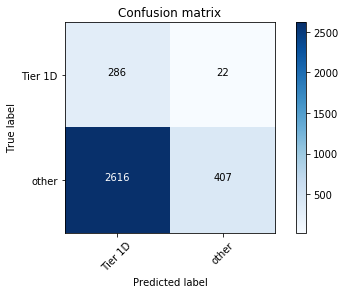

In [192]:
gnb = GaussianNB()
gnb.fit(X_trains, y_trains)
y_predict = gnb.predict(X_testsf)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 175  133]
 [1278 1745]]
             precision    recall  f1-score   support

    Tier 1D       0.12      0.57      0.20       308
      other       0.93      0.58      0.71      3023

avg / total       0.85      0.58      0.66      3331



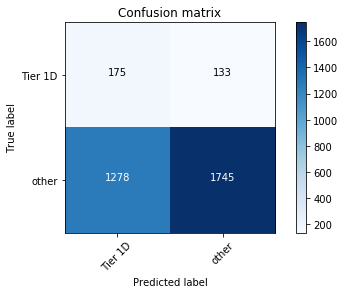

In [193]:
bnb = BernoulliNB()
bnb.fit(X_trains, y_trains)
y_predict = bnb.predict(X_testsf)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 139  169]
 [ 737 2286]]
             precision    recall  f1-score   support

    Tier 1D       0.16      0.45      0.23       308
      other       0.93      0.76      0.83      3023

avg / total       0.86      0.73      0.78      3331



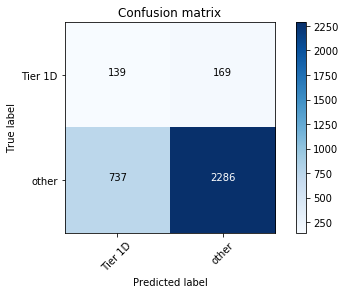

In [194]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_trains, y_trains)
y_predict = rf.predict(X_testsf)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 174  134]
 [1180 1843]]
             precision    recall  f1-score   support

    Tier 1D       0.13      0.56      0.21       308
      other       0.93      0.61      0.74      3023

avg / total       0.86      0.61      0.69      3331



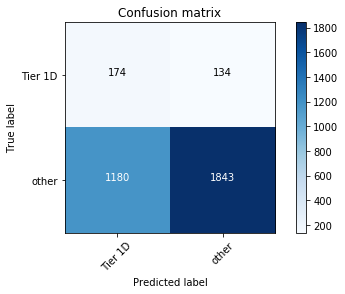

In [195]:
svc = LinearSVC(dual=True)
svc.fit(X_trains, y_trains)
y_predict = svc.predict(X_testsf)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 173  135]
 [ 967 2056]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.56      0.24       308
      other       0.94      0.68      0.79      3023

avg / total       0.87      0.67      0.74      3331



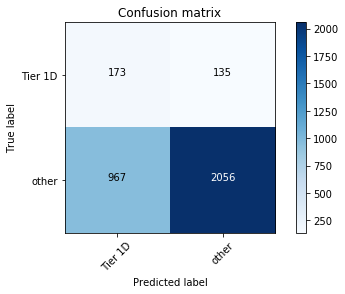

In [196]:
svc = SVC(kernel='rbf')
svc.fit(X_trains, y_trains)
y_predict = svc.predict(X_testsf)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

## Try SMOTE first and PCA

In [163]:
X_trains, y_trains = SMOTE().fit_sample(X_train, y_train)
print(X_trains.shape)
print(Counter(y).items())
print(Counter(y_trains).items())
print(Counter(y_test).items())
print(X_trains.shape)
print("Training size: %r" %X_trains.shape[0])
print("Test size: %r" %X_test.shape[0])
print(Counter(y).items())

(18136, 143)
dict_items([(1, 1232), (0, 12091)])
dict_items([(0, 9068), (1, 9068)])
dict_items([(0, 3023), (1, 308)])
(18136, 143)
Training size: 18136
Test size: 3331
dict_items([(1, 1232), (0, 12091)])


In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_trains)
X_test_pca = pca.transform(X_test)

Confusion matrix, without normalization
[[  82  226]
 [ 206 2817]]
             precision    recall  f1-score   support

    Tier 1D       0.28      0.27      0.28       308
      other       0.93      0.93      0.93      3023

avg / total       0.87      0.87      0.87      3331



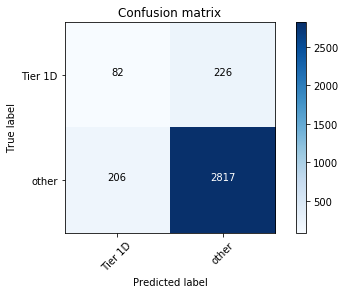

In [164]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_trains, y_trains)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 211   97]
 [1115 1908]]
             precision    recall  f1-score   support

    Tier 1D       0.16      0.69      0.26       308
      other       0.95      0.63      0.76      3023

avg / total       0.88      0.64      0.71      3331



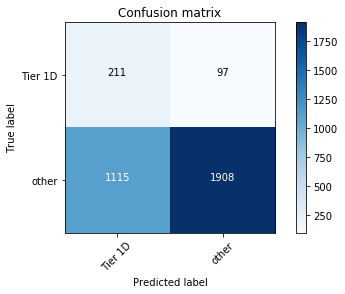

In [165]:
svc = LinearSVC(dual=True)
svc.fit(X_trains, y_trains)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

### deep learning

In [94]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
importlib.reload(func)
%matplotlib inline

In [101]:
train = torch.utils.data.TensorDataset(torch.Tensor(X_train).unsqueeze(1), 
                                       torch.LongTensor(y_train.astype(int)))
train_loader = torch.utils.data.DataLoader(train, batch_size=143, shuffle=True)

test = torch.utils.data.TensorDataset(torch.Tensor(X_test.astype(float).as_matrix()).unsqueeze(1), 
                                       torch.LongTensor(y_test.astype(int).as_matrix()))
test_loader = torch.utils.data.DataLoader(test, batch_size=4, shuffle=False)

In [102]:
net = func.ANet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [103]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
#         if i % 2000 == 1999:
#             print('[%d, %5d] loss: %.5f' %(epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    print(epoch)
print('Finished Training')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Finished Training


In [99]:
classes = ['Other', 'Tier 1D']
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
for data in test_loader:
    images, labels = data
    # print(labels)
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        try:
            label = labels[i]
            class_correct[label] += c[i]
            class_total[label] += 1
        except:
            pass

for i in range(2):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Other: 100 %
Accuracy of Tier 1D:  0 %


In [100]:
classes = ['Other', 'Tier 1D']
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
for data in train_loader:
    images, labels = data
    # print(labels)
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(2):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Other: 100 %
Accuracy of Tier 1D:  0 %


## Try Clustering and Anomaly detection before classification
* DBSCAN and K-Means to find the clusters in the data.
* Building classifiers within each cluster.

In [132]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
importlib.reload(func)

<module 'func' from '/Users/youqiao/workspace/Python/DS598/func.py'>

In [115]:
cluster = func.Clustering(df_101_tier, X, "Tier1D", len(df_101_tier.columns) - 1, 1)

Labels distribution: 
Tier1D
0    12091
1     1232
Name: Tier1D, dtype: int64


In [121]:
categories, y_pred, cluster_centers_, sse, summary = cluster.KMeans_fit_predict(8, preproc=0)
print(summary)

Summary: 
KMeans, k=8 
SSE: 380928315.07235682 
Cluster 0: Counter({0.0: 12044, 1.0: 1229})
Cluster 1: Counter({0.0: 5, 1.0: 1})
Cluster 2: Counter({0.0: 1})
Cluster 3: Counter({0.0: 7, 1.0: 1})
Cluster 4: Counter({0.0: 2})
Cluster 5: Counter({0.0: 1})
Cluster 6: Counter({0.0: 28, 1.0: 1})
Cluster 7: Counter({0.0: 3})



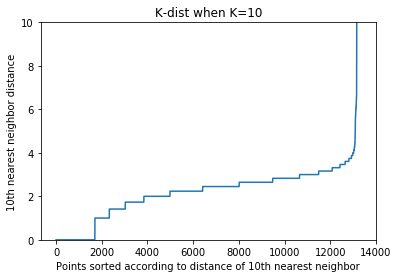

In [130]:
plt.title("K-dist when K=%r" % k)
plt.xlabel("Points sorted according to distance of %rth nearest neighbor" %k)
plt.ylabel("%rth nearest neighbor distance" %k)
plt.ylim((0, 10))
plt.plot(np.arange(0, len(dist)), dist)

In [133]:
categories, y_pred, cluster_centers_, sse, summary = \
cluster.DBSCAN_fit_predict(eps=4, min_s=10, preproc=0)

In [134]:
print(summary)

Summary: 
DBSCAN 
SSE: 12621325623.653902 
Cluster -1: Counter({0.0: 227, 1.0: 12})
Cluster 0: Counter({0.0: 8816, 1.0: 997})
Cluster 1: Counter({0.0: 664, 1.0: 41})
Cluster 2: Counter({0.0: 874, 1.0: 27})
Cluster 3: Counter({0.0: 867, 1.0: 95})
Cluster 4: Counter({0.0: 26, 1.0: 5})
Cluster 5: Counter({0.0: 167, 1.0: 24})
Cluster 6: Counter({0.0: 67, 1.0: 3})
Cluster 7: Counter({0.0: 80, 1.0: 6})
Cluster 8: Counter({0.0: 128, 1.0: 11})
Cluster 9: Counter({0.0: 32, 1.0: 1})
Cluster 10: Counter({0.0: 39, 1.0: 1})
Cluster 11: Counter({0.0: 45, 1.0: 2})
Cluster 12: Counter({0.0: 13, 1.0: 1})
Cluster 13: Counter({0.0: 20, 1.0: 3})
Cluster 14: Counter({0.0: 18})
Cluster 15: Counter({0.0: 8, 1.0: 3})

